In [4]:
import numpy as np
import einops as eo

from utils import display_np_arrays_as_images

In [5]:
display_np_arrays_as_images()

In [8]:
ims = np.load('./test_images.npy', allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


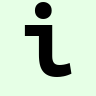

In [12]:
ims[1]

transpose axes

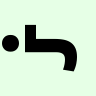

In [23]:
eo.rearrange(ims[1], 'h w c -> w h c')

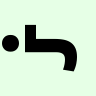

In [24]:
ims[1].transpose(1, 0, 2)

# composition of axes

compose axes - batch and height to new height dimension

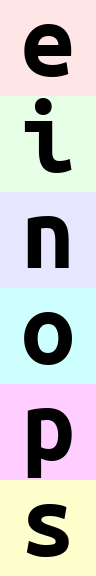

In [25]:
eo.rearrange(ims, 'b h w c -> (b h) w c')

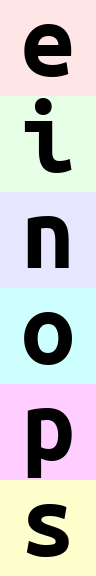

In [32]:
ims.reshape(ims.shape[0]*ims.shape[1], ims.shape[2], ims.shape[-1])

batch and width to a new width dimension

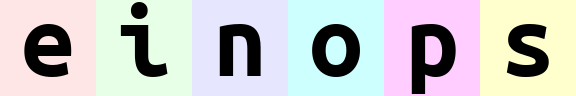

In [30]:
eo.rearrange(ims, 'b h w c -> h (b w) c')

# decomposition of axes

split batch dimension into two dimensions then collapse to 3d

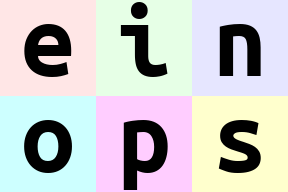

In [40]:
eo.rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c', b1=2)

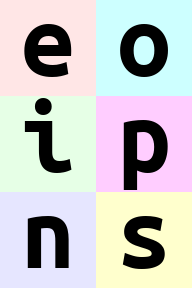

In [41]:
eo.rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c', b1=2)

width to height

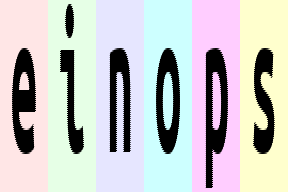

In [44]:
eo.rearrange(ims, 'b h (w stretch) c -> (h stretch) (b w) c', stretch=2)

height to width

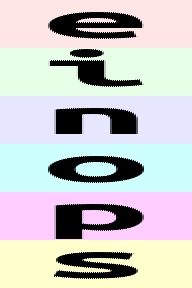

In [45]:
eo.rearrange(ims, 'b (h stretch) w c -> (b h) (w stretch) c', stretch=2)

# Swapping order

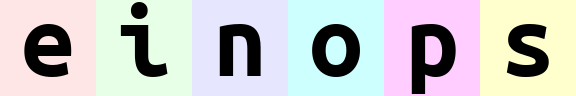

In [50]:
# new width dimension traverses batch->width (each successive element in width for each batch entry)
eo.rearrange(ims, 'b h w c -> h (b w) c')

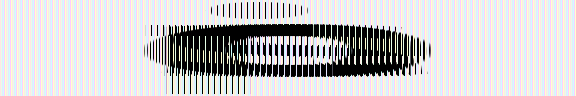

In [51]:
# new width dimension traverses width->batch (each successive batch entry for each element of width)
eo.rearrange(ims, 'b h w c -> h (w b) c')

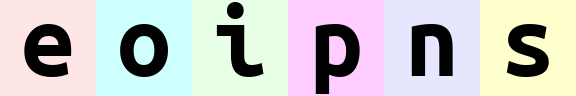

In [55]:
# reorder/transpose virtual batch h/w axes before composing them
eo.rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c', b1=2)

# EOIPNS

# Reduce

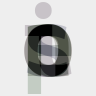

In [57]:
# mean value per batch
eo.reduce(ims, 'b h w c -> h w c', reduction='mean')

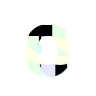

In [59]:
# max value per batch
eo.reduce(ims, 'b h w c -> h w c', reduction='max')

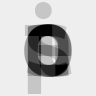

In [62]:
# mean value over all batches and channels
eo.reduce(ims, 'b h w c -> h w', reduction='mean')

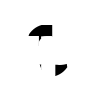

In [60]:
# max value over all batches and channels
eo.reduce(ims, 'b h w c -> h w', reduction='max')

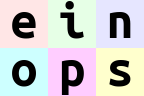

In [66]:
# mean pooling with kernel
kernel_h, kernel_w = (2,2)
eo.reduce(ims, '(b1 b2) (h h2) (w w2) c -> (b1 h) (b2 w) c', b1=2, h2=kernel_h, w2=kernel_w, reduction='mean')

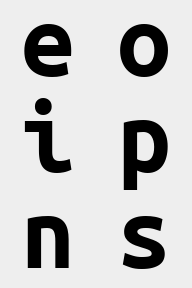

In [68]:
# compose and take mean over channels
eo.reduce(ims, '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2)

# stack and concatenate

can use list of arrays and implicitly stack

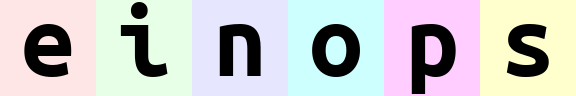

In [75]:
x = list(ims)
eo.rearrange(x, 'b h w c -> h (b w) c')

In [76]:
# can move list axis wherever
eo.rearrange(x, 'b h w c -> h w c b')

<array of shape (96, 96, 3, 6)>
